In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Input, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

num_classes = 10

# normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert class vectors to binary class matrices.
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# partition training set into training and validation set
val_X = X_train[40000:,:]
train_X = X_train[:40000,:]
val_y = y_train[40000:,:]
train_y = y_train[:40000,:]

170508288/170498071 [==============================] - 2s 0us/step


# Parameter Tunning

## Learning Rate

In [23]:
# Define a convolutional neural network

model1 = Sequential()
model1.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu", input_shape=train_X.shape[1:]))
model1.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))
model1.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model1.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model1.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model1.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))
model1.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model1.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model1.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model1.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))
model1.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model1.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model1.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model1.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))
model1.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model1.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))
model1.add(AveragePooling2D(strides=(4, 4), padding = "same"))
model1.add(Flatten())
model1.add(Dense(10, activation = "softmax"))


model1.compile(loss='categorical_crossentropy',
               optimizer=Adam(learning_rate = 0.01),
               metrics=['accuracy'])
  
# create a callback that will save the best model while training
save_best_model1 = ModelCheckpoint('best_model1.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=2)

history1 = model1.fit(train_X, train_y,
                      batch_size=256,
                      epochs=40,
                      validation_data=(val_X, val_y),
                      shuffle=True,
                      callbacks=[save_best_model1])

Epoch 1/40
157/157 [==============================] - ETA: 0s - loss: 1.6410 - accuracy: 0.4040
Epoch 00001: val_accuracy improved from -inf to 0.50980, saving model to best_model1.h5
157/157 [==============================] - 28s 176ms/step - loss: 1.6410 - accuracy: 0.4040 - val_loss: 1.3530 - val_accuracy: 0.5098
Epoch 2/40
157/157 [==============================] - ETA: 0s - loss: 1.1052 - accuracy: 0.6040
Epoch 00002: val_accuracy improved from 0.50980 to 0.64670, saving model to best_model1.h5
157/157 [==============================] - 29s 187ms/step - loss: 1.1052 - accuracy: 0.6040 - val_loss: 1.0123 - val_accuracy: 0.6467
Epoch 3/40
157/157 [==============================] - ETA: 0s - loss: 0.8881 - accuracy: 0.6853
Epoch 00003: val_accuracy improved from 0.64670 to 0.68530, saving model to best_model1.h5
157/157 [==============================] - 30s 189ms/step - loss: 0.8881 - accuracy: 0.6853 - val_loss: 0.9014 - val_accuracy: 0.6853
Epoch 4/40
157/157 [====================

In [24]:
# Define a convolutional neural network

model2 = Sequential()
model2.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu", input_shape=train_X.shape[1:]))
model2.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))
model2.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model2.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model2.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))
model2.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model2.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model2.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))
model2.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model2.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model2.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))
model2.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model2.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))
model2.add(AveragePooling2D(strides=(4, 4), padding = "same"))
model2.add(Flatten())
model2.add(Dense(10, activation = "softmax"))

model2.compile(loss='categorical_crossentropy',
               optimizer=Adam(learning_rate = 0.001),
               metrics=['accuracy'])
  
# create a callback that will save the best model while training
save_best_model2 = ModelCheckpoint('best_model2.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=2)

history2 = model2.fit(train_X, train_y,
                      batch_size=256,
                      epochs=40,
                      validation_data=(val_X, val_y),
                      shuffle=True,
                      callbacks=[save_best_model2])

Epoch 1/40
157/157 [==============================] - ETA: 0s - loss: 1.4135 - accuracy: 0.4917
Epoch 00001: val_accuracy improved from -inf to 0.58940, saving model to best_model2.h5
157/157 [==============================] - 33s 208ms/step - loss: 1.4135 - accuracy: 0.4917 - val_loss: 1.1597 - val_accuracy: 0.5894
Epoch 2/40
157/157 [==============================] - ETA: 0s - loss: 0.9893 - accuracy: 0.6507
Epoch 00002: val_accuracy improved from 0.58940 to 0.64800, saving model to best_model2.h5
157/157 [==============================] - 32s 202ms/step - loss: 0.9893 - accuracy: 0.6507 - val_loss: 0.9794 - val_accuracy: 0.6480
Epoch 3/40
157/157 [==============================] - ETA: 0s - loss: 0.7880 - accuracy: 0.7229
Epoch 00003: val_accuracy improved from 0.64800 to 0.69970, saving model to best_model2.h5
157/157 [==============================] - 32s 201ms/step - loss: 0.7880 - accuracy: 0.7229 - val_loss: 0.8649 - val_accuracy: 0.6997
Epoch 4/40
157/157 [====================

In [25]:
# Define a convolutional neural network

model3 = Sequential()
model3.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu", input_shape=train_X.shape[1:]))
model3.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))
model3.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model3.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model3.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model3.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))
model3.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model3.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model3.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model3.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))
model3.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model3.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model3.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model3.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))
model3.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
model3.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))
model3.add(AveragePooling2D(strides=(4, 4), padding = "same"))
model3.add(Flatten())
model3.add(Dense(10, activation = "softmax"))

model3.compile(loss='categorical_crossentropy',
               optimizer=Adam(learning_rate = 0.0001),
               metrics=['accuracy'])
  
# create a callback that will save the best model while training
save_best_model3 = ModelCheckpoint('best_model3.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=2)

history3 = model3.fit(train_X, train_y,
                      batch_size=256,
                      epochs=40,
                      validation_data=(val_X, val_y),
                      shuffle=True,
                      callbacks=[save_best_model3])

Epoch 1/40
157/157 [==============================] - ETA: 0s - loss: 1.7906 - accuracy: 0.3492
Epoch 00001: val_accuracy improved from -inf to 0.43560, saving model to best_model3.h5
157/157 [==============================] - 25s 154ms/step - loss: 1.7906 - accuracy: 0.3492 - val_loss: 1.5636 - val_accuracy: 0.4356
Epoch 2/40
157/157 [==============================] - ETA: 0s - loss: 1.4321 - accuracy: 0.4857
Epoch 00002: val_accuracy improved from 0.43560 to 0.48900, saving model to best_model3.h5
157/157 [==============================] - 23s 147ms/step - loss: 1.4321 - accuracy: 0.4857 - val_loss: 1.4191 - val_accuracy: 0.4890
Epoch 3/40
157/157 [==============================] - ETA: 0s - loss: 1.2776 - accuracy: 0.5442
Epoch 00003: val_accuracy improved from 0.48900 to 0.52200, saving model to best_model3.h5
157/157 [==============================] - 23s 148ms/step - loss: 1.2776 - accuracy: 0.5442 - val_loss: 1.3400 - val_accuracy: 0.5220
Epoch 4/40
157/157 [====================

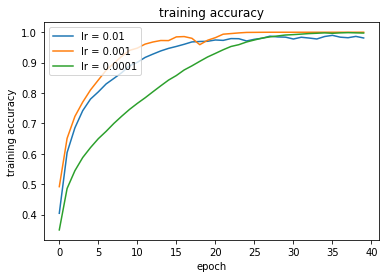

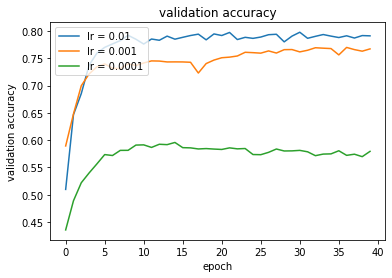

In [26]:
# Plot training accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['lr = 0.01', 'lr = 0.001', 'lr = 0.0001'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['lr = 0.01', 'lr = 0.001', 'lr = 0.0001'], loc='upper left')
plt.show()

# Data Augumentation

In [3]:
# Define a convolutional neural network

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu", input_shape=train_X.shape[1:]))
#model.add(Activation('relu'))

model.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))

model.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
#model.add(Activation('relu'))

model.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
#model.add(Activation('relu'))

model.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))

model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
#model.add(Activation('relu'))

model.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
#model.add(Activation('relu'))

model.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))

model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
#model.add(Activation('relu'))

model.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
#model.add(Activation('relu'))

model.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))

model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
#model.add(Activation('relu'))

model.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))

model.add(AveragePooling2D(strides=(4, 4), padding = "same"))

model.add(Flatten())

model.add(Dense(10, activation = "softmax"))
#model.add(Activation('softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 16)       32        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 16)       32        
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                        

Using real-time data augmentation.
Epoch 1/60
625/625 [==============================] - ETA: 0s - loss: 1.4146 - accuracy: 0.4867
Epoch 00001: val_accuracy improved from -inf to 0.59670, saving model to best_model.h5
625/625 [==============================] - 39s 61ms/step - loss: 1.4146 - accuracy: 0.4867 - val_loss: 1.1338 - val_accuracy: 0.5967
Epoch 2/60
625/625 [==============================] - ETA: 0s - loss: 1.0290 - accuracy: 0.6333
Epoch 00002: val_accuracy improved from 0.59670 to 0.68930, saving model to best_model.h5
625/625 [==============================] - 44s 70ms/step - loss: 1.0290 - accuracy: 0.6333 - val_loss: 0.8822 - val_accuracy: 0.6893
Epoch 3/60
625/625 [==============================] - ETA: 0s - loss: 0.8652 - accuracy: 0.6938
Epoch 00003: val_accuracy improved from 0.68930 to 0.72430, saving model to best_model.h5
625/625 [==============================] - 45s 71ms/step - loss: 0.8652 - accuracy: 0.6938 - val_loss: 0.7841 - val_accuracy: 0.7243
Epoch 4/60


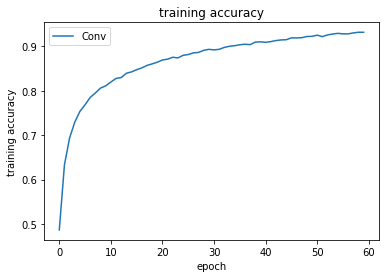

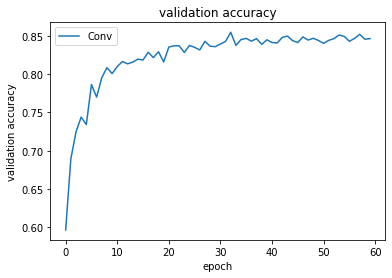

313/313 [==============================] - 4s 11ms/step - loss: 0.4615 - accuracy: 0.8511
Test accuracy: 0.8511000275611877


In [4]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
  
# create a callback that will save the best model while training
save_best_model = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False  # randomly flip images
    )

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
it_train = datagen.flow(train_X, train_y, batch_size = 64)

steps = int(train_X.shape[0] / 64)

# Fit the model on the batches generated by datagen.flow().
history = model.fit(it_train, 
                    steps_per_epoch=steps, 
                    epochs=60, 
                    validation_data=(val_X, val_y), 
                    verbose=1, 
                    callbacks=[save_best_model])

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(history.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='upper left')
plt.show()

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model = load_model('best_model.h5')
scores = saved_model.evaluate(X_test, y_test, verbose=1)
print('Test accuracy:', scores[1])

In [5]:
extractor = Model(inputs=model.inputs, outputs=[layer.output for layer in model.layers])
activations = extractor(X_train)

In [6]:
example = extractor.predict(np.expand_dims(X_train[0], axis = 0))
#activations = extractor.predict(X_train) # Returns a list of five Numpy arrays: one array per layer activation

The Example Image


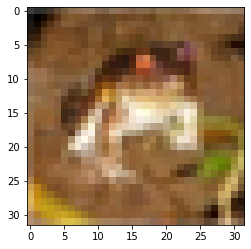

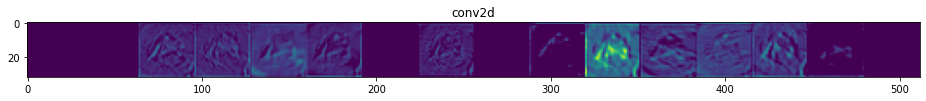

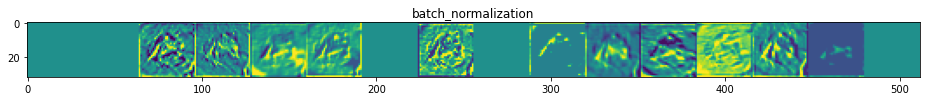

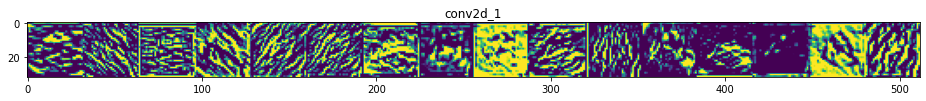

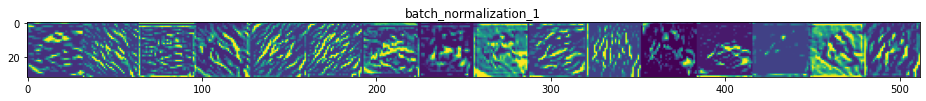

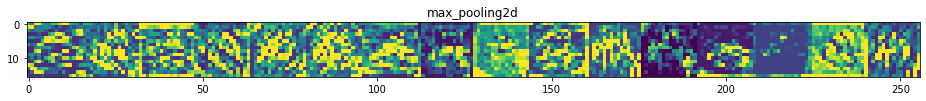

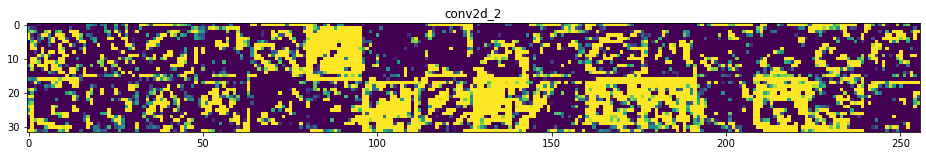

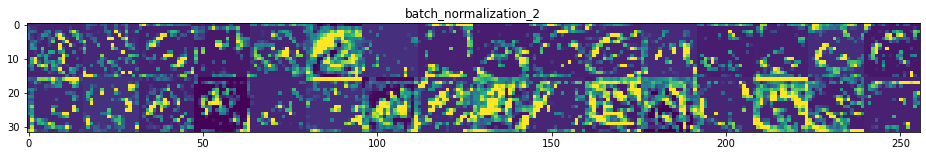

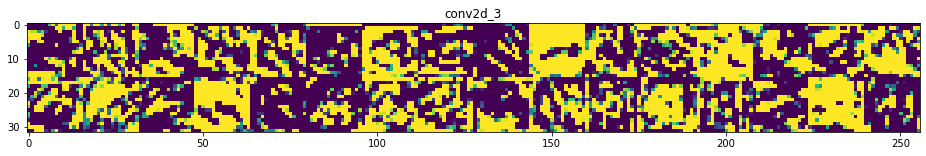

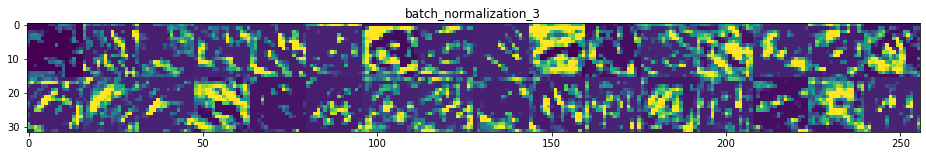

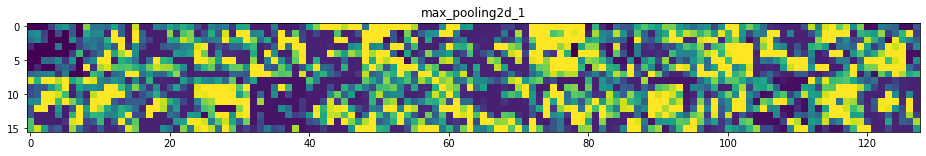

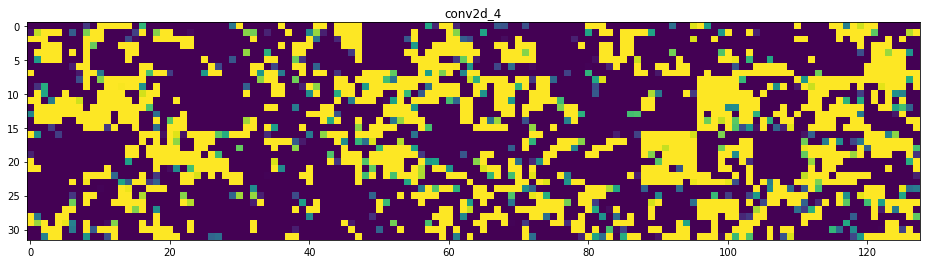

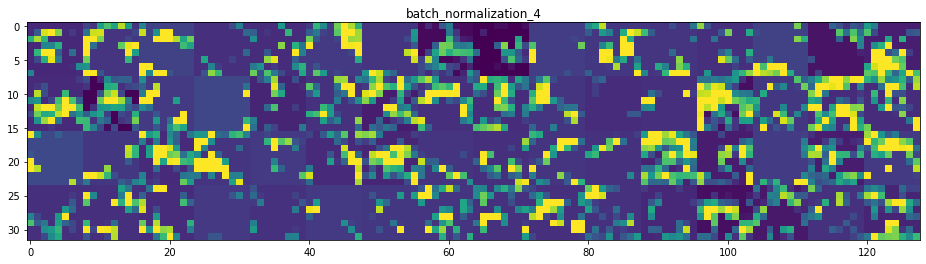

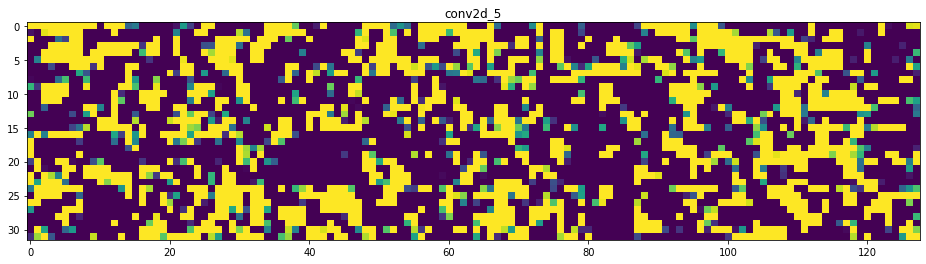

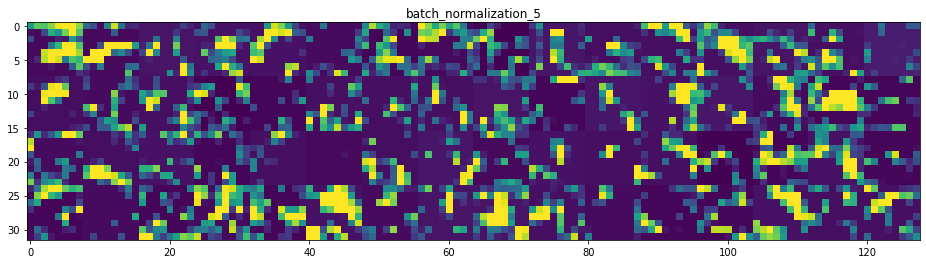

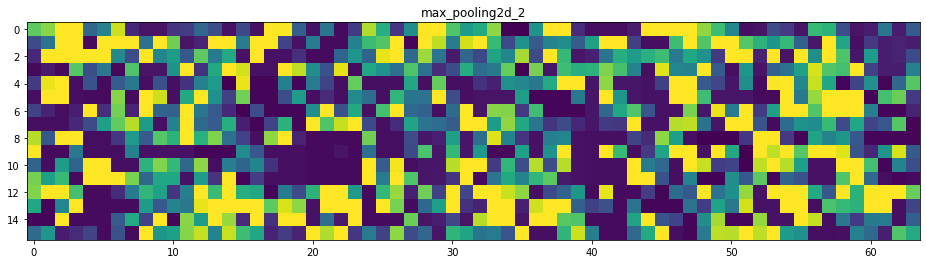

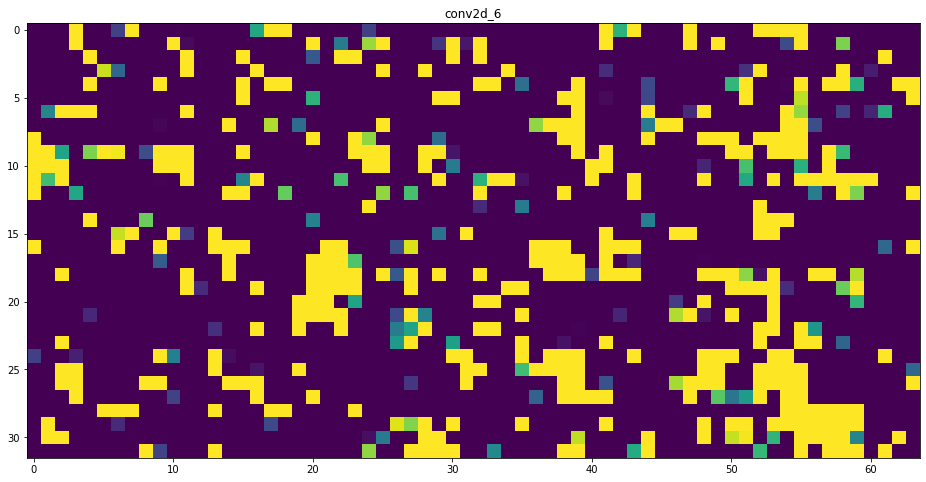

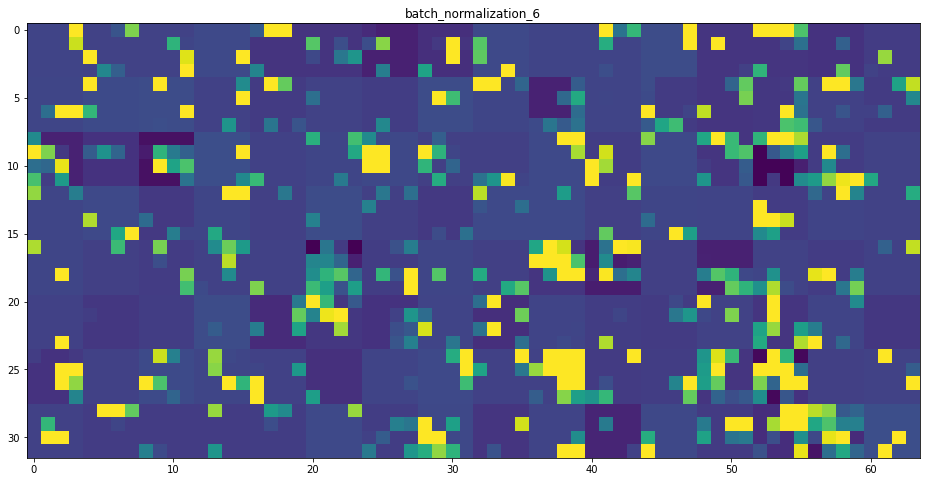

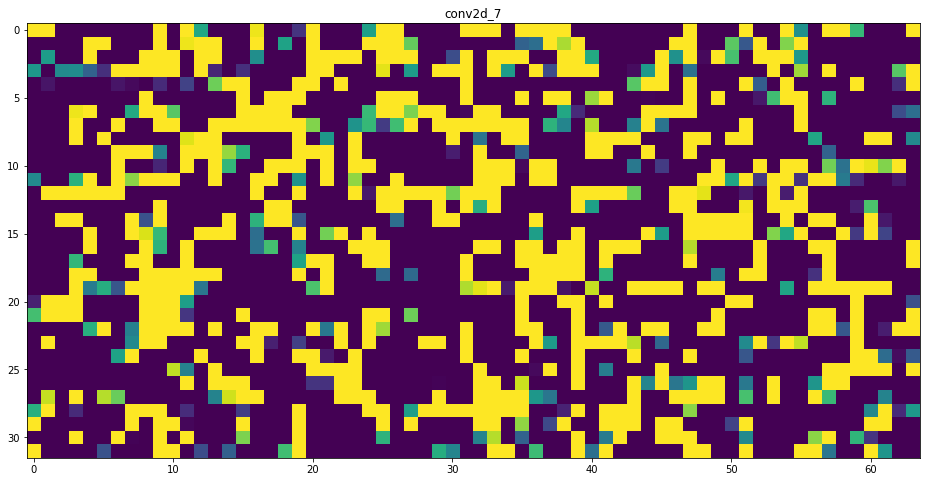

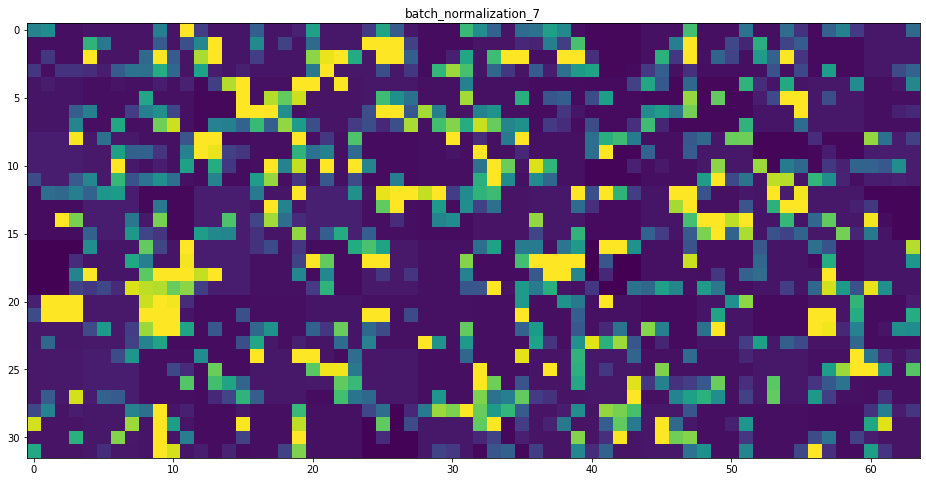

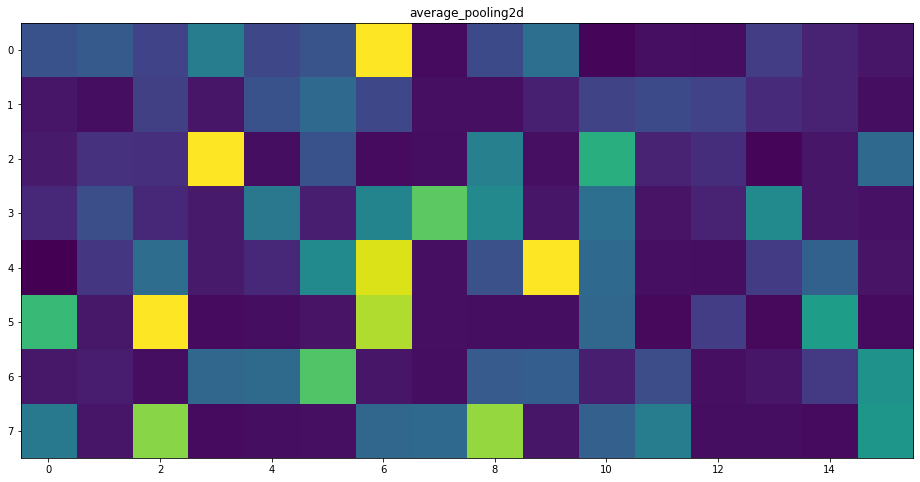

In [7]:
print("The Example Image")
# plot raw pixel data
plt.imshow(X_train[0])
# show the figure
plt.show()

layer_names = []
for layer in model.layers:
  layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in list(zip(layer_names, example))[:20]: # Displays the feature maps
  n_features = layer_activation.shape[-1] # Number of features in the feature map
  size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
  n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  for col in range(n_cols): # Tiles each filter into a big horizontal grid
    for row in range(images_per_row):
      channel_image = layer_activation[0, :, :, col * images_per_row + row]
      #print(type(channel_image))
      #channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
      #channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8') 
      display_grid[col * size : (col + 1) * size, # Displays the grid
                   row * size : (row + 1) * size] = channel_image
  scale = 1. / size
  plt.figure(figsize=(scale * display_grid.shape[1],
                      scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

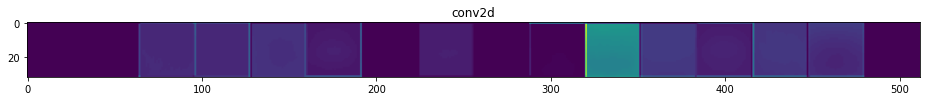

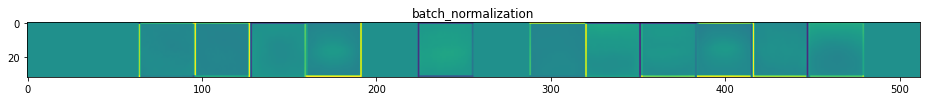

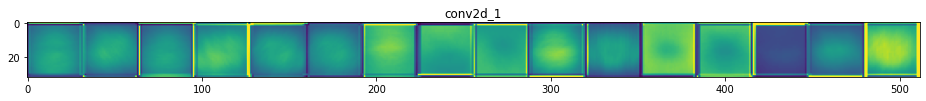

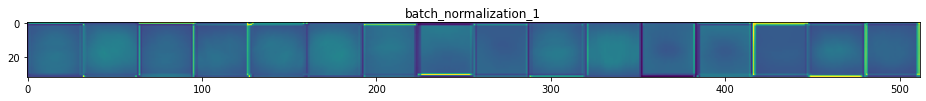

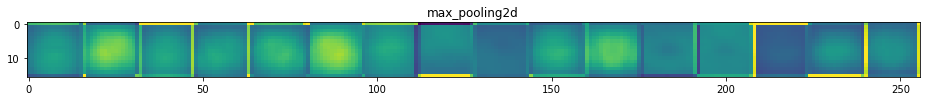

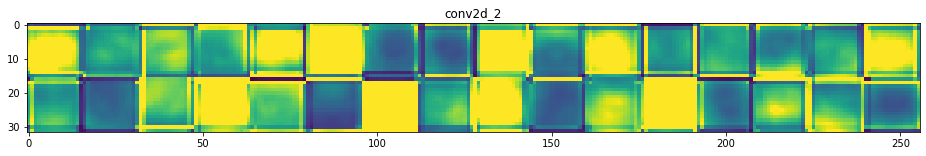

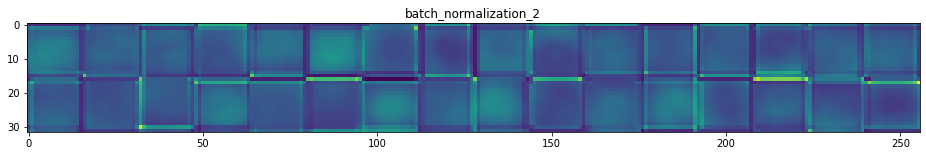

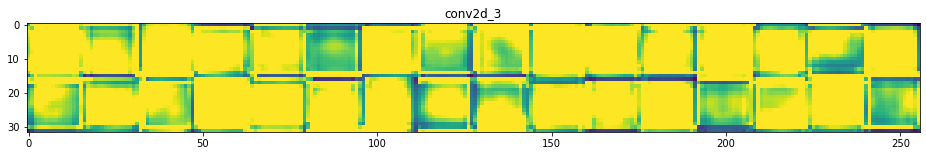

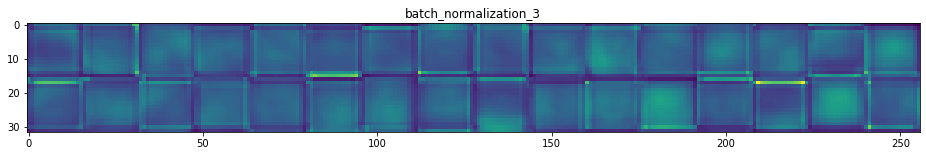

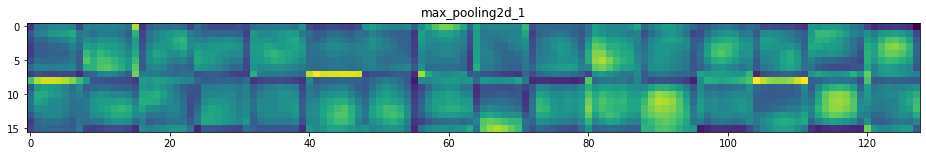

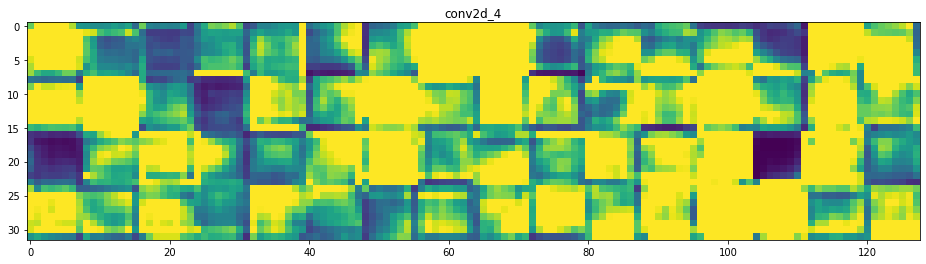

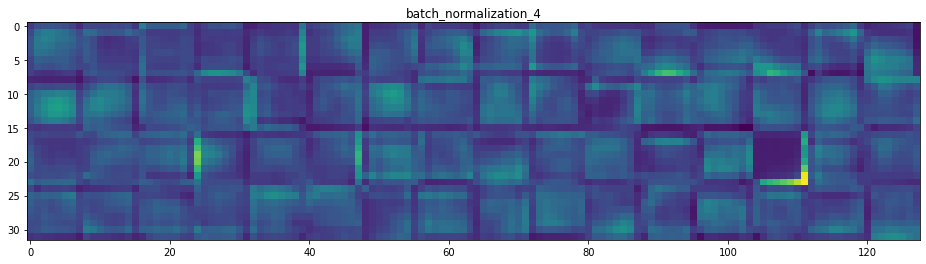

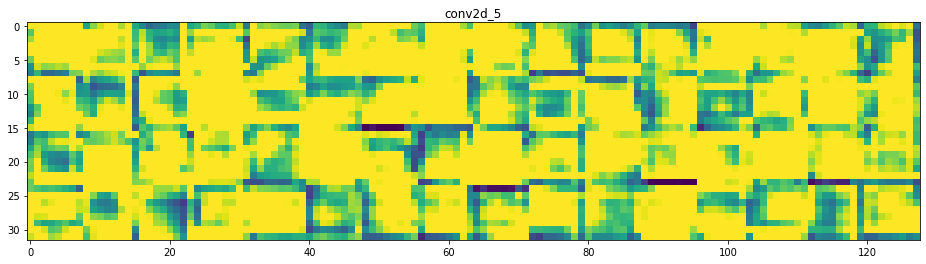

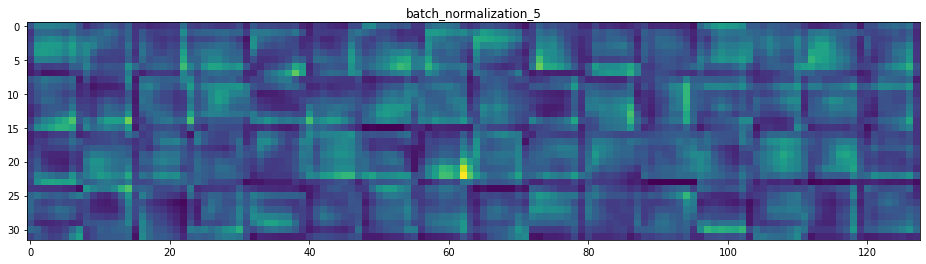

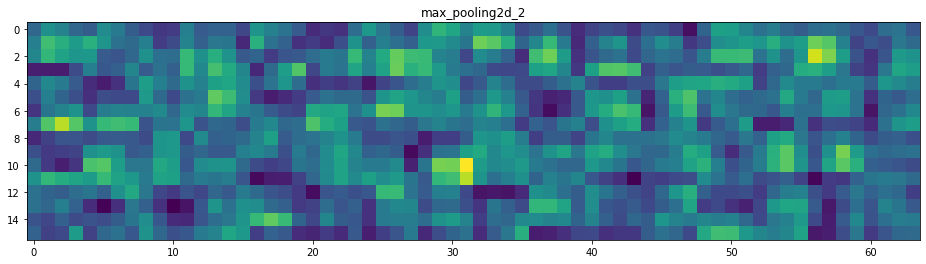

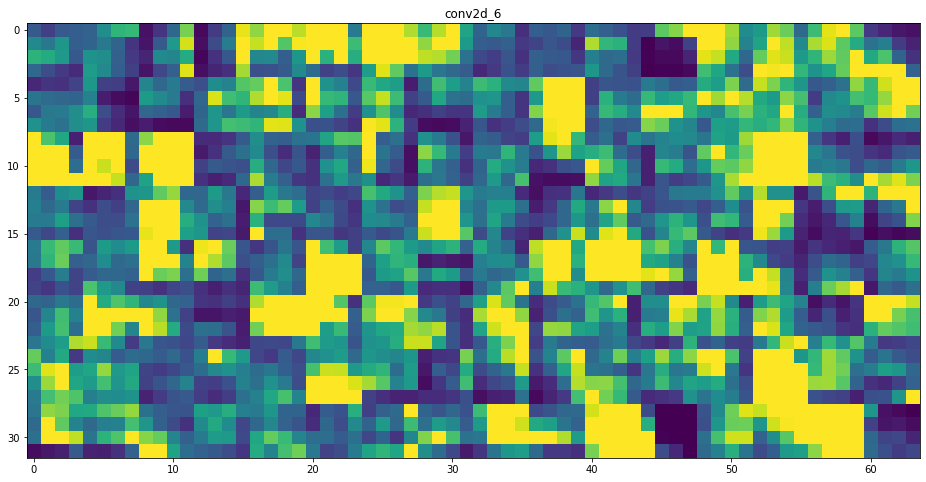

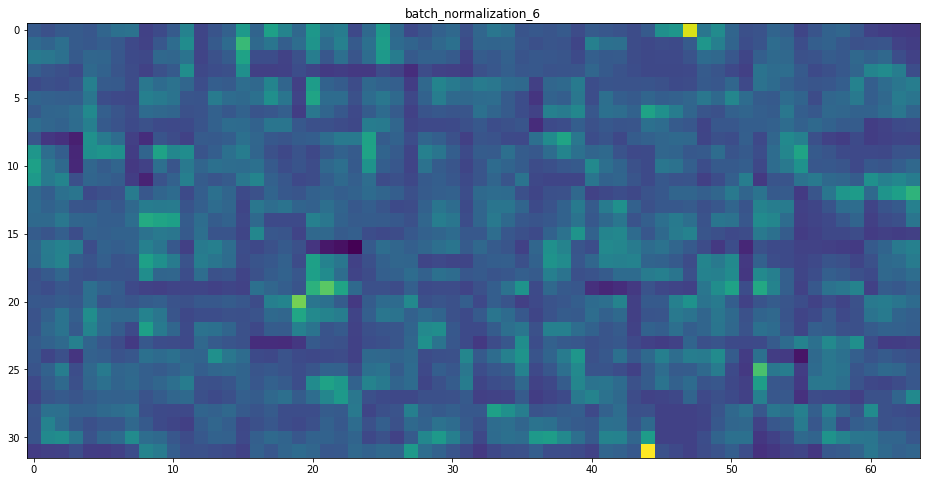

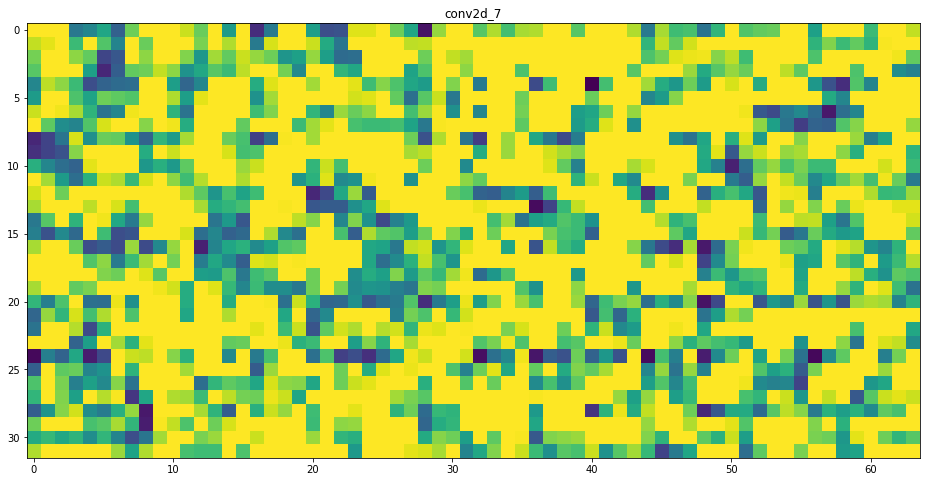

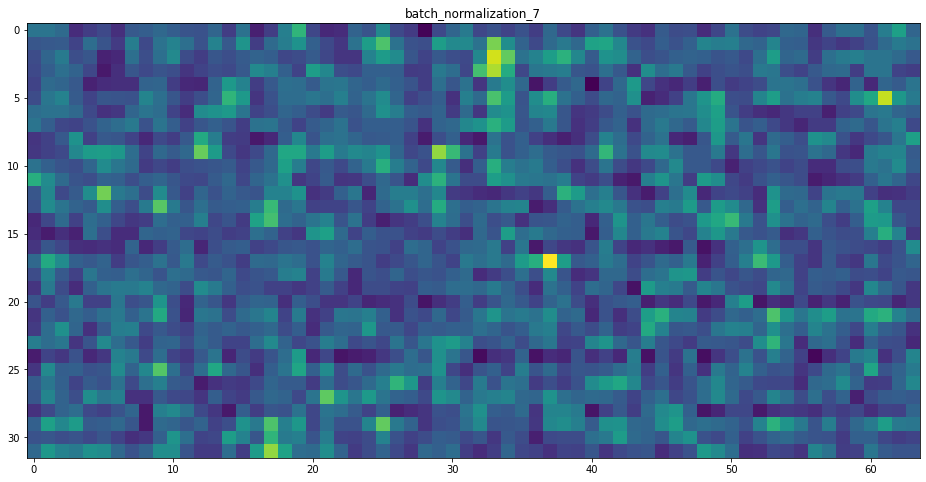

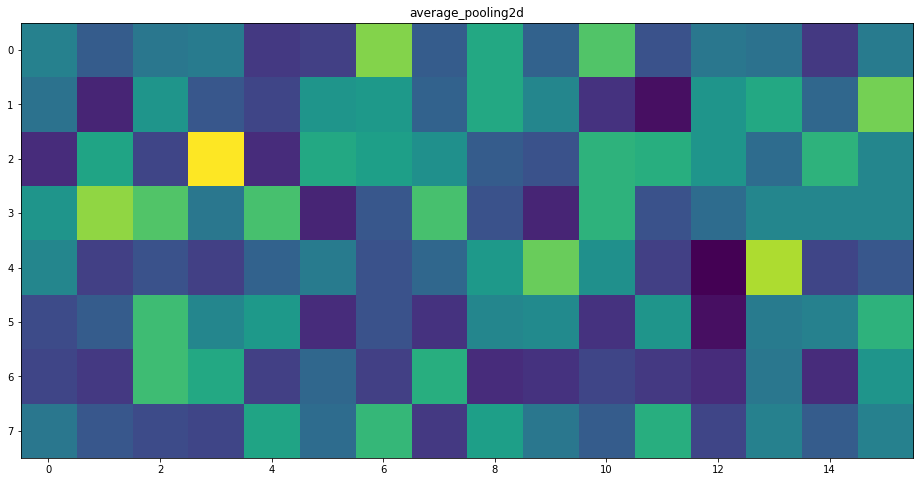

In [8]:
layer_names = []
for layer in model.layers:
  layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in list(zip(layer_names, activations))[:20]: # Displays the feature maps
  layer_activation = layer_activation.numpy()
  layer_activation = np.expand_dims(np.mean(layer_activation, axis = 0), axis = 0)
  n_features = layer_activation.shape[-1] # Number of features in the feature map
  size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
  n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  for col in range(n_cols): # Tiles each filter into a big horizontal grid
    for row in range(images_per_row):
      channel_image = layer_activation[0, :, :, col * images_per_row + row]
      #print(type(channel_image))
      #channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
      #channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8') 
      display_grid[col * size : (col + 1) * size, # Displays the grid
                   row * size : (row + 1) * size] = channel_image
  scale = 1. / size
  plt.figure(figsize=(scale * display_grid.shape[1],
                      scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [9]:
abs_avgs = []
for act in activations:
  abs_avgs.append(np.mean(np.absolute(act.numpy().flatten())))
df = pd.DataFrame(list(zip(layer_names, abs_avgs)), columns = ['Layers', 'Average Absolute Values of Activations'])

In [10]:
scaler = MinMaxScaler()
df["Normalized Average Absolute Values of Activations"] = scaler.fit_transform(df["Average Absolute Values of Activations"].values.reshape(-1, 1))
df

,Layers,Average Absolute Values of Activations,Normalized Average Absolute Values of Activations
0,conv2d,0.158158,0.026164
1,batch_normalization,0.516576,0.187409
2,conv2d_1,1.127947,0.462451
3,batch_normalization_1,0.759166,0.296545
4,max_pooling2d,1.059110,0.431483
5,conv2d_2,1.563431,0.658367
6,batch_normalization_2,0.786673,0.308920
7,conv2d_3,2.322821,1.000000
8,batch_normalization_3,0.791937,0.311288
9,max_pooling2d_1,1.087580,0.444291


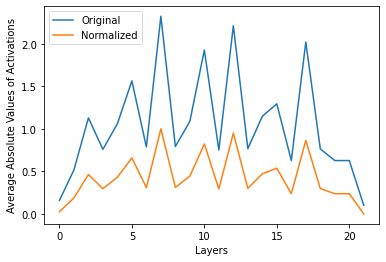

In [11]:
# plt.plot(df.index, 'Average Absolute Values of Weights', data = df)
plt.plot(df.index, 'Average Absolute Values of Activations', data = df)
plt.plot(df.index, 'Normalized Average Absolute Values of Activations', data = df)
plt.ylabel('Average Absolute Values of Activations')
plt.xlabel('Layers')
plt.legend(['Original', 'Normalized'], loc='upper left')
plt.show()

# Additional Tests

Epoch 1/60
157/157 [==============================] - ETA: 0s - loss: 0.0272 - accuracy: 0.9906
Epoch 00001: val_accuracy improved from -inf to 0.83430, saving model to best_model_normal.h5
157/157 [==============================] - 41s 256ms/step - loss: 0.0272 - accuracy: 0.9906 - val_loss: 1.0904 - val_accuracy: 0.8343
Epoch 2/60
157/157 [==============================] - ETA: 0s - loss: 0.0197 - accuracy: 0.9937
Epoch 00002: val_accuracy improved from 0.83430 to 0.84010, saving model to best_model_normal.h5
157/157 [==============================] - 35s 221ms/step - loss: 0.0197 - accuracy: 0.9937 - val_loss: 1.0979 - val_accuracy: 0.8401
Epoch 3/60
157/157 [==============================] - ETA: 0s - loss: 0.0144 - accuracy: 0.9950
Epoch 00003: val_accuracy did not improve from 0.84010
157/157 [==============================] - 36s 226ms/step - loss: 0.0144 - accuracy: 0.9950 - val_loss: 1.0863 - val_accuracy: 0.8360
Epoch 4/60
157/157 [==============================] - ETA: 0s - 

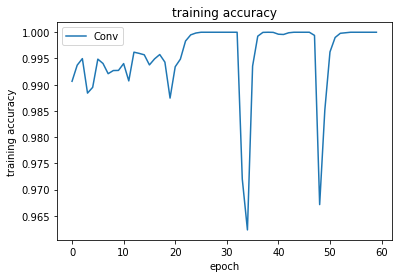

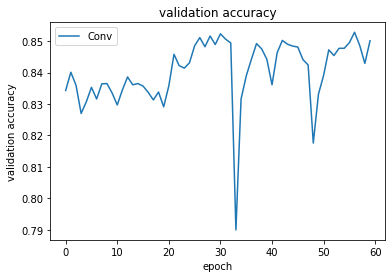

313/313 [==============================] - 3s 10ms/step - loss: 1.0688 - accuracy: 0.8454
Test accuracy: 0.8453999757766724


In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate = 0.01),
              metrics=['accuracy'])
  
# create a callback that will save the best model while training
save_best_model_normal = ModelCheckpoint('best_model_normal.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

history_normal = model.fit(train_X, train_y,
                           batch_size=256,
                           epochs=60,
                           validation_data=(val_X, val_y),
                           shuffle=True,
                           callbacks=[save_best_model_normal])

# Plot training accuracy
plt.plot(history_normal.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(history_normal.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='upper left')
plt.show()

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model = load_model('best_model_normal.h5')
scores = saved_model.evaluate(X_test, y_test, verbose=1)
print('Test accuracy:', scores[1])